In this notebook I will try to implement GPT-2, do certian modifications and parallely training them<br>
Report Link- https://docs.google.com/document/d/1GFmy-Myz6E8zoJ6kK4BI3HyFjZS65bu74RLucI5sfJU/edit?usp=sharing

# Subjective  Questions

## Q.1
Given a logistic regression that learns particular weights given n features, there would be n weights w0,w1,.......wn. So, in the new condition, nth feature gets duplicated to (n+1)th quality, so we now have n+1 total elements, and the model was retrained, so new weights were wnew(0),wnew(1),...........,wnew(n+1). The task was to find the relations between these unknown weights. There are chances the new weights are similar to the previous weights, but certainly, there would be changes due to further redundancy introduced; the weights upto wnew(n) would be identical to the original consequences, and as the new weight is also for the duplicated feature so the extent of its difference from the original weight depends mainly on the extent of the feature that was duplicated.

## Q.2
Given the original template, A. New templates were introduced: B, C, D, and E for each email template, and 1000 copies were sent.
These are the CTR details. <br>  
A:10% <br>
B:7%<br>
C:8.5%<br>
D:12%<br>
E:14%<br>
So from this, what we conclude is that.<br>
As E is more clicked than A, and if the difference is statistically significant, we can conclude that E is 95% more significant than A
The same goes for B and A; A is more clicked than B, and if their difference is statistically significant, then A is 95% more significant than A. <br>
 But as the difference between C and D between A is lesser than previously, we may need some tests to conclude the significance.
So, option 2 is correct.


## Q.3
Given m training examples and n features. The feature vectors are given as sparse; sparse vectors mean the vectors that contain much fewer non-zero entries as given k non-zero entries and k<<n. So, we need to find the gradient descent for logistic regression in any well-maintained package. The gradient descent calculation involves computing the gradient and updating the weights.
The gradient vector computation would involve a dot product between the feature and weight vector as most of them are zeros so the time complexity would be around O(n.k)  n for vectors and k for the weights(an approximation). <br>
The single-time weight updation would take O(n) time so that the total time would be around.<br>
O(m.k.n+n) m for the number of training examples, and m.k.n would be more than n so that the time complexity would be around O(m.k.n)


## Q.4
Given V1, a text classifier trained on 10,000 stories from the New York Times, which was a part of 1000  sources from which data can be collected, now we need to train. V2, with these 10,000 stories and new 10,000 stories.
The 10K stories from random sources out of the 1000 we want is a good option as we get the data from only trusted sources.  
The training of V1 on 1 million stories from data sources captures examples near the decision boundary, potentially addressing ambiguous cases that the current classifier struggles with. This leads to some complex examples for V2 to learn that provide better examples.
A balance between these would be an excellent option, like getting a balance of both 5000, which makes 5000 complex examples, and the other 5000 examples will provide diversity in our dataset from different sources. This 1:1 ratio can be changed accordingly if needed.


## Q.5
Given an unfair coin, where p is the probability of coming of heads. The coin was tossed n times, and heads came up k times
1. MLE(Maximum Likelihood Estimation)-
	 As the heads come up k in the time toss, the MLE would be
	n/k
2. The Bayesian estimate involves incorporating prior information. In this case, assuming a uniform prior between 0 and 1, the posterior distribution is a Beta distribution. The posterior distribution's expected value (mean) is the Bayesian estimate.

Bayesian estimate of p=(k+1)/(n+2)
3.
Maximum a posteriori (MAP) Estimate:
The MAP estimate is the mode of the posterior distribution. For a Beta distribution with a uniform prior, the mode is given by:

MAP estimate of p=k/n


# Importing Libraries

In [ ]:
!pip install einops xformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.8/211.8 MB 6.5 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.nn.modules import ModuleList
from torch.nn.modules.normalization import LayerNorm
from torch import nn, einsum, broadcast_tensors
import torch
import torch.optim as optim
from torch.optim.lr_scheduler import LambdaLR
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import Dataset
import torch.distributed as dist
import torch.multiprocessing as mp
from torch.nn.parallel import DistributedDataParallel as DDP
from torch.utils.data.distributed import DistributedSampler
from torch.distributed.fsdp import (
   FullyShardedDataParallel,
   CPUOffload,
)

from torch.distributed.fsdp import FullyShardedDataParallel as FSDP
from torch.distributed.fsdp.fully_sharded_data_parallel import (
    CPUOffload,
    BackwardPrefetch,
)
from torch.distributed.fsdp.wrap import (
    size_based_auto_wrap_policy,
    enable_wrap,
    wrap,
)


from einops import rearrange, repeat
from einops import rearrange, repeat, pack, unpack

import os
import copy
import glob
import shutil
from math import pi, log
import math
import time
from dataclasses import dataclass
from typing import Optional, Union
import logging
from tqdm import tqdm

from transformers import GPT2Tokenizer
from xformers.components.attention import (
    Attention,
    AttentionConfig,
    AttentionMask,
    maybe_sparsify,
    register_attention,
    sparsify,
)
from xformers.components.attention.attention_patterns import (
    causal_1d_pattern,
    local_1d_pattern,
)

from tqdm import tqdm_notebook, trange
import logging
logging.basicConfig(level = logging.INFO)
logger = logging.getLogger()

    PyTorch 2.1.0+cu121 with CUDA 1201 (you have 2.1.0+cu118)
    Python  3.10.13 (you have 3.10.12)
  Please reinstall xformers (see https://github.com/facebookresearch/xformers#installing-xformers)
  Memory-efficient attention, SwiGLU, sparse and more won't be available.
  Set XFORMERS_MORE_DETAILS=1 for more details


setting up random seed

In [ ]:
seed = 42
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)

checking for device

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Transformer Decoder
The GPT-X series is a decoder only models, so there needs to a be transformer blocks that we need to define our self attention layers and layers
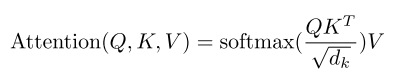

This is the self attention formula as defined in the paper of attention is all you need which contains three variables as qeury, key and value and then the attemtion value is Q dot k(Transpose)/sqrt(dK*dimensions*) whole by V

## Conv1d
This is a layer that takes input and then return the output with 3 times dimension of original layer because we are dot multiplying 3 matrcies of same size, these can also be retrieved using split function

In [ ]:
class Conv1D(nn.Module):
    def __init__(self, nx, nf):
        '''
        nx: Number of input features.
        nf: Number of filters (output channels).
        '''
        super().__init__()
        self.nf = nf
        #intialising an empty matrix as weights for size of (nx)X(nf)
        w = torch.empty(nx, nf)
        #initialising these weights as normal distribution
        nn.init.normal_(w, std=0.02)
        #calculating the weights and biases by encoding them using nn.Parameter
        self.weight = nn.Parameter(w)
        self.bias = nn.Parameter(torch.zeros(nf))

    def forward(self, x):
        '''x:The input tensor'''
        #this size output is summation of x second dimension and the nf dimension
        size_out = x.size()[:-1] + (self.nf,)
        # dot multiplying Q,K(transpose) and V
        x = torch.addmm(self.bias, x.view(-1, x.size(-1)), self.weight)#x.view helps in taking the transpose out
        x = x.view(*size_out)
        return x

Here is a demo code for running it

In [ ]:
d_model = 768
conv1d  = Conv1D(d_model, d_model*3)
x = torch.rand(1,4,d_model) # A random input tensor for testing out our model
x = conv1d(x)
x.shape

torch.Size([1, 4, 2304])

In [ ]:
query, key, value = x.split(d_model, dim=-1)# here we can split our output attention into quey, key and value

query.shape, key.shape, value.shape

(torch.Size([1, 4, 768]), torch.Size([1, 4, 768]), torch.Size([1, 4, 768]))

## Feed Forward Layer
In the GPT paper they mentioned the use of feed forward layer that takes a input then casting them to a 4x dimeniosn and then returning them back to original output shape with GELU as an activation function with a dropout value of 0.1
Here is an excpert from GPT-1 Paper
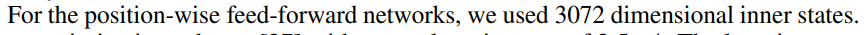

For the activation function, we used the Gaussian Error Linear Unit (GELU)<br>
 attention dropouts with a rate of 0.1 for regularization<br>
Also an excerpt from GPT-1 Paper

In [ ]:
class FeedForward(nn.Module):
    def __init__(self, dropout, d_model=768, nx=768*4):
        super().__init__()
        self.c_fc    = Conv1D(d_model, nx)
        self.c_proj  = Conv1D(nx, d_model)
        self.act     = F.gelu
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        return self.dropout(self.c_proj(self.act(self.c_fc(x))))

# Attention
In the paper they mentione to use the dot product attention that wa slaso mentioned in the paper of attention is all you need which calculate sthe attention based on formula mentioned above <br>
There can be multiple heads of attentions which we call multi head attention<br>
Multi-head attention enhances neural networks by allowing them to focus on different aspects of input sequences simultaneously, and where multiple attention heads operate in parallel to capture diverse patterns and dependencies.

In [ ]:
class Attention(nn.Module):
    def __init__(self, d_model=768, n_head=12, n_ctx=1024, d_head=64, bias=True, scale=False):
        '''Constructor funtion
        Params:
        d_model:The dimension that needs to be feed into our model
        n_head:The number of heads for attention
        n_ctx:a parameters for buffer registry for bias
        d_head:the dimension head output
        bias:A bool for including or not including bias
        scale: Whether to scale the attention scores by the square root of the dimension of the queries(use sqrt(dk) or not) "
        '''
        super().__init__()
        self.n_head  = n_head
        self.d_model = d_model
        self.c_attn  = Conv1D(d_model, d_model*3)
        self.scale   = scale
        self.softmax = nn.Softmax(dim=-1)
        self.register_buffer("bias", torch.tril(torch.ones(n_ctx, n_ctx)).view(1, 1, n_ctx, n_ctx))
        self.dropout = nn.Dropout(0.1)
        self.c_proj  = Conv1D(d_model, d_model)

    def split_heads(self, x):
        """
        spliting inyo given number of heads and then returning
        return shape [`batch`, `head`, `sequence`, `features`]
        """
        new_shape = x.size()[:-1] + (self.n_head, x.size(-1)//self.n_head)
        x = x.view(*new_shape)
        return x.permute(0, 2, 1, 3)

    def _attn(self, q, k, v, attn_mask=None):
        """The main attention function
        That claculates the attention using our dot product formula"""
        scores  = torch.matmul(q, k.transpose(-2, -1))# dot multiplication between q and k transpose
        if self.scale: scores = scores/math.sqrt(v.size(-1))# scaling it by dividing by sqrt(dk)
        nd, ns  = scores.size(-2), scores.size(-1)
        if attn_mask is not None: scores = scores + attn_mask# adding scores with attention mask values
        scores  = self.softmax(scores)# adding softmax values
        scores  = self.dropout(scores) #dropout of 0.1 as mentioned
        outputs = torch.matmul(scores, v) # now the final matrix multiplication between score and V
        return outputs

    def merge_heads(self, x):
        # merging the attention heads into one
        x = x.permute(0, 2, 1, 3).contiguous()
        new_shape = x.size()[:-2] + (x.size(-2)*x.size(-1),)
        return x.view(*new_shape)

    def forward(self, x):
        '''The feed forward function that calculates the attention, split the heads, make attention, merge heads and project out the output '''
        x        = self.c_attn(x) #new `x` shape - `[1,3,2304]`
        q, k, v  = x.split(self.d_model, dim=2)
        q, k, v  = self.split_heads(q), self.split_heads(k), self.split_heads(v)
        out      = self._attn(q, k, v)
        out      = self.merge_heads(out)
        out      = self.c_proj(out)
        return out

# GPT-2 Architecture
The GPT architetcure consisted of using transformer blocks here is a archietecture from paper itself


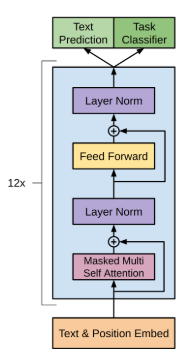

As in the image we can see that the trasnformer consists of masked multi self attention which means the use of attention masks with self attention with a skip connection, a layer normalization, the feed forward block following a layer normalization again which is being repeated 12 times<br>
The difference between the GPT-1 and GPT-2 was that Layer normalization
was moved to the input of each sub-block and skip connections over all

In [ ]:
class TransformerBlock(nn.Module):
    def __init__(self, d_model=768, n_head=12, dropout=0.1):
        super(TransformerBlock, self).__init__()
        self.attn        = Attention(d_model=768, n_head=12, d_head=64, n_ctx=1024, bias=True, scale=False)
        self.feedforward = FeedForward(dropout=0.1, d_model=768, nx=768*4)
        self.ln_1        = LayerNorm(d_model)
        self.ln_2        = LayerNorm(d_model)

    def forward(self, x):
        x = x + self.attn(self.ln_1(x))
        x = x + self.feedforward(self.ln_2(x))
        return x

In [ ]:
def _get_clones(module, n):
    '''Here we can make certain copies of transformers'''
    return ModuleList([copy.deepcopy(module) for i in range(n)])

In [ ]:
class GPT2(nn.Module):
    def __init__(self, nlayers=12, n_ctx=1024, d_model=768, vcb_sz=50257):
        '''nlayer:The number of times the tarnsformer needs to get cloned
        n_ctx:The highest length that can be these to get teh string positional embeddings
        d_model:The dimenionalities for model
        vcb_sz:The vocablury size which can be later altered while training'''
        super(GPT2, self).__init__()
        self.nlayers = nlayers
        block        = TransformerBlock(d_model=768, n_head=12, dropout=0.1)
        self.h       = _get_clones(block, 12)
        self.wte     = nn.Embedding(vcb_sz, d_model)
        self.wpe     = nn.Embedding(n_ctx, d_model)
        self.drop    = nn.Dropout(0.1)
        self.ln_f    = LayerNorm(d_model)
        self.out     = nn.Linear(d_model, vcb_sz, bias=False)
        self.loss_fn = nn.CrossEntropyLoss()
        self.init_weights()

    def init_weights(self):
        '''Initialization of weights'''
        self.out.weight = self.wte.weight
        self.apply(self._init_weights)

    def _init_weights(self, module):
        '''If the Linear, Embedding and Conv1D then nomrally initializing with mean and S.D'''
        if isinstance(module, (nn.Linear, nn.Embedding, Conv1D)):
            module.weight.data.normal_(mean=0.0, std=0.02)
            if isinstance(module, (nn.Linear, Conv1D)) and module.bias is not None:
                '''Data Bias zero'''
                module.bias.data.zero_()
        elif isinstance(module, nn.LayerNorm):
            module.bias.data.zero_()
            module.weight.data.fill_(1.0)

    def forward(self, src, labels=None, pos_ids=None):
        '''Adding the positional embedding, dropping, then adding inputs, logits and outputs which are being used for loss function and then adding outputs and loss'''
        if pos_ids is None:
            pos_ids = torch.arange(0, src.size(-1)).unsqueeze(0)
        pos_ids = pos_ids.to(src.device)  # Ensure pos_ids is on the same device as src
        inp = self.drop((self.wte(src) + self.wpe(pos_ids)))
        for i in range(self.nlayers): inp = self.h[i](inp)
        inp     = self.ln_f(inp)
        logits  = self.out(inp)
        outputs = (logits,) + (inp,)

        if labels is not None:
            shift_logits = logits[..., :-1, :].contiguous()
            shift_labels = labels[..., 1:].contiguous()
            loss = self.loss_fn(shift_logits.view(-1, shift_logits.size(-1)), shift_labels.view(-1))
            outputs = (loss,) + outputs
            return loss.mean()
        return logits

# Valdiating our loaded model

In [ ]:
model = GPT2()
# load pretrained_weights from hugging face

model_dict = model.state_dict() #currently with random initialization
state_dict = torch.load("/content/drive/MyDrive/gpt2-pytorch_model.bin") #pretrained weights

In [ ]:
old_keys = []
new_keys = []
for key in state_dict.keys():
    if "mlp" in key: #The hugging face state dict references the feedforward network as mlp, need to replace to `feedforward` be able to reuse these weights
        new_key = key.replace("mlp", "feedforward")
        new_keys.append(new_key)
        old_keys.append(key)

for old_key, new_key in zip(old_keys, new_keys):
    state_dict[new_key]=state_dict.pop(old_key)

pretrained_dict = {k: v for k, v in state_dict.items() if k in model_dict}

model_dict.update(pretrained_dict)
model.load_state_dict(model_dict)
model.eval() #model in inference mode as it's now initialized with pretrained weights

GPT2(
  (h): ModuleList(
    (0-11): 12 x TransformerBlock(
      (attn): Attention(
        (c_attn): Conv1D()
        (softmax): Softmax(dim=-1)
        (dropout): Dropout(p=0.1, inplace=False)
        (c_proj): Conv1D()
      )
      (feedforward): FeedForward(
        (c_fc): Conv1D()
        (c_proj): Conv1D()
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
    )
  )
  (wte): Embedding(50257, 768)
  (wpe): Embedding(1024, 768)
  (drop): Dropout(p=0.1, inplace=False)
  (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  (out): Linear(in_features=768, out_features=50257, bias=False)
  (loss_fn): CrossEntropyLoss()
)

In [ ]:
total_params = sum(p.numel() for p in model.parameters())

# Calculate size in bytes and megabytes
size_bytes = total_params * 4  # Assuming float32 parameters, where each parameter is 4 bytes
size_mb = size_bytes / (1024 ** 2)

print(f"Total size of the GPT-2 without any altertaions is: {size_bytes} bytes or {size_mb:.2f} MB")

Total size of the GPT-2 without any altertaions is: 497759232 bytes or 474.70 MB


# Generating Text
This is being used for generating text with the encoder from hugging face, then getting the logits, parsing them through softmax and then getting the context by adding context to our next token, time is also being calculated for inference with the inference time and decoded tetx as output

In [ ]:
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
context = torch.tensor([tokenizer.encode("The planet earth")])

def generate(context, ntok=20):
    start_time = time.time()
    for _ in range(ntok):
        out = model(context)
        logits = out[:, -1, :]
        indices_to_remove = logits < torch.topk(logits, 10)[0][..., -1, None]
        logits[indices_to_remove] = np.NINF
        next_tok = torch.multinomial(F.softmax(logits, dim=-1), num_samples=1).squeeze(1)
        context = torch.cat([context, next_tok.unsqueeze(-1)], dim=-1)
    end_time = time.time()
    inference_time = end_time - start_time
    return context, inference_time

out, inference_time = generate(context, ntok=20)
decoded_output = tokenizer.decode(out[0])

print(f"Inference Time: {inference_time:.4f} seconds")
print(f"Generated Output: {decoded_output}")

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

Inference Time: 4.3494 seconds
Generated Output: The planet earth is going to do something. about. into something about my own. is the go on is thing


# Changing the rotatory transformer
The main difference between positional and rortatory embeddings is the rotational component like a circle with a certain radius and a angle to differ between different embeddings, it is helpful as it combines both the positional and rotational embedding like this

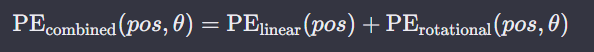

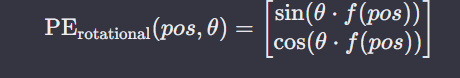

## Helper functions
Here are the helper function that we need to implement it in our original implementation

In [ ]:
def exists(val):
    return val is not None

def default(val, d):
    return val if exists(val) else d

def broadcat(tensors, dim = -1):
    broadcasted_tensors = broadcast_tensors(*tensors)
    return torch.cat(broadcasted_tensors, dim = dim)

In [ ]:
def rotate_half(x):
    '''The initial step of our roformer includes use of In order to generalize our results in 2D to any xi ∈ R
  d where d is even, we divide the d-dimension space into d/2
  sub-spaces and combine them in the merit of the linearity of the inner product, turning f{q,k} into
  The above was excerpt from paper which involves splitting into d/2'''
    x = rearrange(x, '... (d r) -> ... d r', r = 2)
    x1, x2 = x.unbind(dim = -1)
    x = torch.stack((-x2, x1), dim = -1)
    return rearrange(x, '... d r -> ... (d r)')

In [ ]:
def apply_rotary_emb(freqs, t, start_index = 0, scale = 1., seq_dim = -2):
    '''a function for applying the rotatory embeddings frst getting the rotation dimension and sequence length
    getting the end index by adding the start index and rotation dimension as mentioned above,
    the t left, t and t right with the before token segment, during token segment and after token segment
    Applies the rotational embedding to the central portion of t.
    The rotation involves a combination of cosine and sine operations using the specified frequencies and scaling factor.  '''
    rot_dim, seq_len = freqs.shape[-1], t.shape[seq_dim]
    freqs = freqs[-seq_len:].to(t)
    end_index = start_index + rot_dim
    t_left, t, t_right = t[..., :start_index], t[..., start_index:end_index], t[..., end_index:]
    t = (t * freqs.cos() * scale) + (rotate_half(t) * freqs.sin() * scale)
    return torch.cat((t_left, t, t_right), dim = -1)

In [ ]:
def apply_learned_rotations(rotations, t, start_index = 0, freq_ranges = None):
    '''Learning rotations by frequency handling by scaling out the rotations  this rearrangement helps in combining the rottations into one
    now repeating the rotations by replicating the rotations and then applying the rotatory embeddings'''
    if exists(freq_ranges):
        rotations = einsum('..., f -> ... f', rotations, freq_ranges)
        rotations = rearrange(rotations, '... r f -> ... (r f)')

    rotations = repeat(rotations, '... n -> ... (n r)', r = 2)
    return apply_rotary_emb(rotations, t, start_index = start_index)

In [ ]:
class RotaryEmbedding(nn.Module):
    def __init__(
        self,
        dim,
        theta = 10000,
        max_freq = 10,
        num_freqs = 1,
        interpolate_factor = 1.,
        theta_rescale_factor = 1.,
    ):
        '''This is a constructor class for our rotatory embeddings
        theta: the angle for rotation
        max_freq:the max frequency for rotation
        num_freq:the number of times frequencies need to be iterated
        interpolate factor: A factor used to control the value of positional embedding if it is low or high
        theta_rescale_factor:As the theta decays with the learning so we need to rescale it for decaying
        '''
        super().__init__()
        theta *= theta_rescale_factor ** (dim / (dim - 2))


        freqs = 1. / (theta ** (torch.arange(0, dim, 2)[:(dim // 2)].float() / dim))

        self.cache = dict()
        self.cache_scale = dict()
        self.freqs = nn.Parameter(freqs)


        # default sequence dimension

        self.default_seq_dim = -2

        # interpolation factors

        assert interpolate_factor >= 1.
        self.interpolate_factor = interpolate_factor

        # xpos
        self.register_buffer('scale', None)


        scale = (torch.arange(0, dim, 2) + 0.4 * dim) / (1.4 * dim)
        self.register_buffer('scale', scale)

    def get_seq_pos(self, seq_len, device, dtype, offset = 0):
        '''
        The function to get the seq positonal embedding using torch.arange which uses [end-start]/start dividing by interpolation factor to control its value
         '''
        return (torch.arange(seq_len, device = device, dtype = dtype) + offset) / self.interpolate_factor

    def rotate_queries_or_keys(self, t, seq_dim = None, offset = 0, freq_seq_len = None):
        '''A function to operate the rotation over queries and keys'''
        seq_dim = default(seq_dim, self.default_seq_dim)


        device, dtype, seq_len = t.device, t.dtype, t.shape[seq_dim]#getting device, data type and sequence length

        if exists(freq_seq_len):
            assert freq_seq_len >= seq_len
            seq_len = freq_seq_len

        freqs = self.forward(lambda: self.get_seq_pos(seq_len, device = device, dtype = dtype, offset = offset), cache_key = f'freqs:{seq_len}|offset:{offset}')

        if seq_dim == -3:
            freqs = rearrange(freqs, 'n d -> n 1 d')

        return apply_rotary_emb(freqs, t, seq_dim = seq_dim)#applying the final operations over t value

    def forward(self, t, cache_key = None):
        '''The forward function for porpagting our t value'''
        should_cache = exists(cache_key)

        if should_cache and cache_key in self.cache:
            return self.cache[cache_key]

        if callable(t):
            t = t()

        freqs = self.freqs

        freqs = einsum('..., f -> ... f', t.type(freqs.dtype), freqs)# converting the frequency into its transpose
        freqs = repeat(freqs, '... n -> ... (n r)', r = 2)

        if should_cache:
            self.cache[cache_key] = freqs

        return freqs

## Applying in our attention block
In the paper it was mentioned that we need to use the rotatory embedding with the query and key value so we need to change our attention block

In [ ]:
class Attention_rope(nn.Module):
    def __init__(self, d_model=768, n_head=12, n_ctx=1024, d_head=64, bias=True, scale=False):
        '''Constructor funtion
        Params:
        d_model:The dimension that needs to be feed into our model
        n_head:The number of heads for attention
        n_ctx:a parameters for buffer registry for bias
        d_head:the dimension head output
        bias:A bool for including or not including bias
        scale: Whether to scale the attention scores by the square root of the dimension of the queries(use sqrt(dk) or not) "
        '''
        super().__init__()
        self.n_head  = n_head
        self.d_model = d_model
        self.c_attn  = Conv1D(d_model, d_model*3)
        self.scale   = scale
        self.softmax = nn.Softmax(dim=-1)
        self.register_buffer("bias", torch.tril(torch.ones(n_ctx, n_ctx)).view(1, 1, n_ctx, n_ctx))
        self.dropout = nn.Dropout(0.1)
        self.c_proj  = Conv1D(d_model, d_model)
        self.rotary_emb = RotaryEmbedding(dim = 32)#intializing the rotatory embedding with dimension 32

    def split_heads(self, x):
        """
        spliting inyo given number of heads and then returning
        return shape [`batch`, `head`, `sequence`, `features`]
        """
        new_shape = x.size()[:-1] + (self.n_head, x.size(-1)//self.n_head)
        x = x.view(*new_shape)
        return x.permute(0, 2, 1, 3)

    def _attn(self, q, k, v, attn_mask=None):
        """The main attention function
        That claculates the attention using our dot product formula"""
        scores  = torch.matmul(q, k.transpose(-2, -1))# dot multiplication between q and k transpose
        if self.scale: scores = scores/math.sqrt(v.size(-1))# scaling it by dividing by sqrt(dk)
        nd, ns  = scores.size(-2), scores.size(-1)
        if attn_mask is not None: scores = scores + attn_mask# adding scores with attention mask values
        scores  = self.softmax(scores)# adding softmax values
        scores  = self.dropout(scores) #dropout of 0.1 as mentioned
        outputs = torch.matmul(scores, v) # now the final matrix multiplication between score and V
        return outputs

    def merge_heads(self, x):
        # merging the attention heads into one
        x = x.permute(0, 2, 1, 3).contiguous()
        new_shape = x.size()[:-2] + (x.size(-2)*x.size(-1),)
        return x.view(*new_shape)

    def forward(self, x):
        '''The feed forward function that calculates the attention, split the heads, make attention, merge heads and project out the output '''
        x        = self.c_attn(x) #new `x` shape - `[1,3,2304]`
        q, k, v  = x.split(self.d_model, dim=2)
        q, k, v  = self.split_heads(q), self.split_heads(k), self.split_heads(v)
        #applying the rotatory embeddings over query and key
        q = self.rotary_emb.rotate_queries_or_keys(q)
        k = self.rotary_emb.rotate_queries_or_keys(k)
        out      = self._attn(q, k, v)
        out      = self.merge_heads(out)
        out      = self.c_proj(out)
        return out

In [ ]:
class TransformerBlock_rope(nn.Module):
    def __init__(self, d_model=768, n_head=12, dropout=0.1):
        super().__init__()
        self.attn        = Attention_rope(d_model=768, n_head=12, d_head=64, n_ctx=1024, bias=True, scale=False)
        self.feedforward = FeedForward(dropout=0.1, d_model=768, nx=768*4)
        self.ln_1        = LayerNorm(d_model)
        self.ln_2        = LayerNorm(d_model)

    def forward(self, x):
        x = x + self.attn(self.ln_1(x))
        x = x + self.feedforward(self.ln_2(x))
        return x

In [ ]:
class GPT2_rope(nn.Module):
    def __init__(self, nlayers=12, n_ctx=1024, d_model=768, vcb_sz=50257):
        super(GPT2_rope, self).__init__()
        self.nlayers = nlayers
        block        = TransformerBlock_rope(d_model=768, n_head=12, dropout=0.1)
        self.h       = _get_clones(block, 12)
        self.wte     = nn.Embedding(vcb_sz, d_model)
        self.wpe     = nn.Embedding(n_ctx, d_model)
        self.drop    = nn.Dropout(0.1)
        self.ln_f    = LayerNorm(d_model)
        self.out     = nn.Linear(d_model, vcb_sz, bias=False)
        self.loss_fn = nn.CrossEntropyLoss()
        self.init_weights()

    def init_weights(self):
        '''Initialization of weights'''
        self.out.weight = self.wte.weight
        self.apply(self._init_weights)

    def _init_weights(self, module):
        '''If the Linear, Embedding and Conv1D then nomrally initializing with mean and S.D'''
        if isinstance(module, (nn.Linear, nn.Embedding, Conv1D)):
            module.weight.data.normal_(mean=0.0, std=0.02)
            if isinstance(module, (nn.Linear, Conv1D)) and module.bias is not None:
                '''Data Bias zero'''
                module.bias.data.zero_()
        elif isinstance(module, nn.LayerNorm):
            module.bias.data.zero_()
            module.weight.data.fill_(1.0)

    def forward(self, src, labels=None, pos_ids=None):
        '''Adding the positional embedding, dropping, then adding inputs, logits and outputs which are being used for loss function and then adding outputs and loss'''
        if pos_ids is None: pos_ids = torch.arange(0, src.size(-1)).unsqueeze(0)
        inp = self.drop((self.wte(src)+self.wpe(pos_ids)))
        for i in range(self.nlayers): inp = self.h[i](inp)
        inp     = self.ln_f(inp)
        logits  = self.out(inp)
        outputs = (logits,) + (inp,)

        if labels is not None:
            shift_logits = logits[..., :-1, :].contiguous()
            shift_labels = labels[..., 1:].contiguous()
            loss = self.loss_fn(shift_logits.view(-1, shift_logits.size(-1)), shift_labels.view(-1))
            outputs = (loss,) + outputs
            return outputs
        return logits

## Generating text and checking model stats

In [ ]:
model = GPT2_rope()
# load pretrained_weights from hugging face

model_dict = model.state_dict() #currently with random initialization
state_dict = torch.load("/content/drive/MyDrive/gpt2-pytorch_model.bin") #pretrained weights

In [ ]:
old_keys = []
new_keys = []
for key in state_dict.keys():
    if "mlp" in key: #The hugging face state dict references the feedforward network as mlp, need to replace to `feedforward` be able to reuse these weights
        new_key = key.replace("mlp", "feedforward")
        new_keys.append(new_key)
        old_keys.append(key)

for old_key, new_key in zip(old_keys, new_keys):
    state_dict[new_key]=state_dict.pop(old_key)

pretrained_dict = {k: v for k, v in state_dict.items() if k in model_dict}

model_dict.update(pretrained_dict)
model.load_state_dict(model_dict)
model.eval() #model in inference mode as it's now initialized with pretrained weights

GPT2_rope(
  (h): ModuleList(
    (0-11): 12 x TransformerBlock_rope(
      (attn): Attention_rope(
        (c_attn): Conv1D()
        (softmax): Softmax(dim=-1)
        (dropout): Dropout(p=0.1, inplace=False)
        (c_proj): Conv1D()
        (rotary_emb): RotaryEmbedding()
      )
      (feedforward): FeedForward(
        (c_fc): Conv1D()
        (c_proj): Conv1D()
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
    )
  )
  (wte): Embedding(50257, 768)
  (wpe): Embedding(1024, 768)
  (drop): Dropout(p=0.1, inplace=False)
  (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  (out): Linear(in_features=768, out_features=50257, bias=False)
  (loss_fn): CrossEntropyLoss()
)

In [ ]:
total_params = sum(p.numel() for p in model.parameters())

# Calculate size in bytes and megabytes
size_bytes = total_params * 4  # Assuming float32 parameters, where each parameter is 4 bytes
size_mb = size_bytes / (1024 ** 2)

print(f"Total size of the GPT-2 with rortaory embeddings any is: {size_bytes} bytes or {size_mb:.2f} MB")

Total size of the GPT-2 without any altertaions is: 497760000 bytes or 474.70 MB


From previous model there is a bit more size there is a negligible in case of even bytes, so use of rotatory embeddings didn't altered much model size as there is no architectural changes in our model we just caclulated the query and keys in a bit different manner

In [ ]:
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
context = torch.tensor([tokenizer.encode("The planet earth")])

def generate(context, ntok=20):
    start_time = time.time()
    for _ in range(ntok):
        out = model(context)
        logits = out[:, -1, :]
        indices_to_remove = logits < torch.topk(logits, 10)[0][..., -1, None]
        logits[indices_to_remove] = np.NINF
        next_tok = torch.multinomial(F.softmax(logits, dim=-1), num_samples=1).squeeze(1)
        context = torch.cat([context, next_tok.unsqueeze(-1)], dim=-1)
    end_time = time.time()
    inference_time = end_time - start_time
    return context, inference_time

out, inference_time = generate(context, ntok=20)
decoded_output = tokenizer.decode(out[0])

print(f"Inference Time: {inference_time:.4f} seconds")
print(f"Generated Output: {decoded_output}")

Inference Time: 6.9594 seconds
Generated Output: The planet earth's most important planet. " important's important. More than ever. More important enough more! MORE


1. Also the inference time is higher beacause in this case we are taking a skort sequence so the O(n) complexity for the self attention is being over compensated by the computataion for rotational embeddings, it is mainliy beneficial for long sequence that we encounter during training time
2. Also, the GPT-2 was not trained with the roformer embeddings so during inferencing with it we can get random results like we got in above case, so it is advised to first train, or may be fine tune gpt-2 with roformer before inferencing

# Sliding Window Attention
Sliding window attention was introduced in longformer paper to make accesibilty for the longer context lengths and less computation so it can be used for longer document size <br>



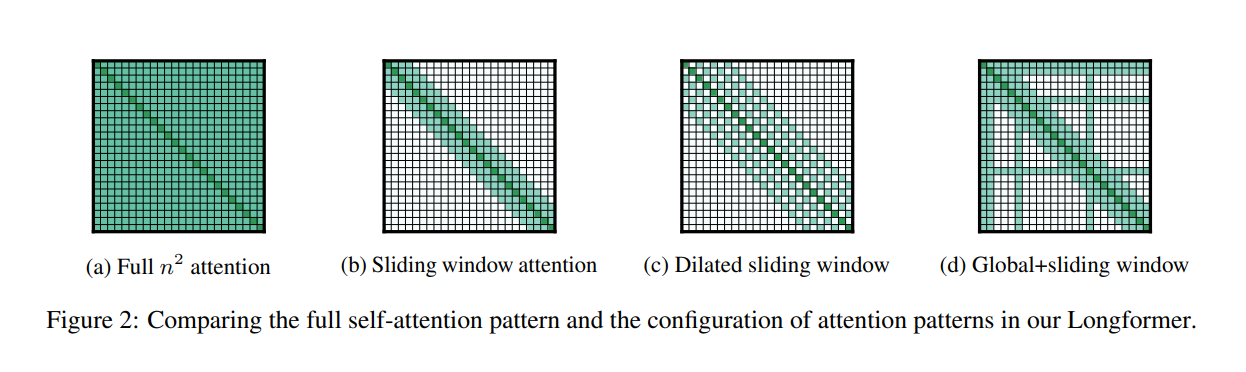

So in the the case of sliding window attention we can see that fr each time it is convering the 2n+1 blocks in case of sliding window attention so it will conver n x w blocks so it will scale linearly with n

So for the transformer they proposed the for initial layers use sliding window attention and for the later use global attention

## Helper Functions

These are some basic functions to do some basic operations

In [ ]:
def exists(val):
    return val is not None

def default(value, d):
    return d if not exists(value) else value

def to(t):
    return {'device': t.device, 'dtype': t.dtype}

def max_neg_value(tensor):
    return -torch.finfo(tensor.dtype).max

In [ ]:
def pad_to_multiple(tensor, multiple, dim=-1, value=0):
    '''Function for padding over tensor for how many times which is multiple here
    if the seqlen is not a muliple of multiple so we need to pad the remaining for which we caluclate the remainder and then pad the remainder
    Params:
    tensor:The tensor that needs to be pad
    multiple:The multiple upto which padding is happenining
    dim: the dimension accross for padding
    value:what should the padded values'''
    seqlen = tensor.shape[dim]
    m = seqlen / multiple
    if m.is_integer():
        return False, tensor
    remainder = math.ceil(m) * multiple - seqlen#calculating the remaninder after the multiple padding has happened
    pad_offset = (0,) * (-1 - dim) * 2
    return True, F.pad(tensor, (*pad_offset, 0, remainder), value = value)

In [ ]:
def look_around(x, backward = 1, forward = 0, pad_value = -1, dim = 2):
    '''This is a function for padding our x with the sliding window attention mechanism first getting the shapes and dimensions
    then padding the x from backward to forward which is of range of window 2n+1
    now we iteratively pad with different combination of windows by loop over the forward+backward+1
    and finally concatenating all the different tensors that are formed resulting in our final attention'''
    t = x.shape[1]
    dims = (len(x.shape) - dim) * (0, 0)
    padded_x = F.pad(x, (*dims, backward, forward), value = pad_value)
    tensors = [padded_x[:, ind:(ind + t), ...] for ind in range(forward + backward + 1)]
    return torch.cat(tensors, dim = dim)

## Appyling in attention block

In [ ]:
class Attention_rope_slide(nn.Module):
    def __init__(self, d_model=768, n_head=12,window_size=3, n_ctx=1024, d_head=64, bias=True, scale=False,look_forward=1,look_backward=1):
        '''An implementation of a sliding window attention, as proposed in Longformer I am also combing the rotationaol embeddings with it for
        checking out the results
        Params:
        d_model:The dimension that needs to be feed into our model
        n_head:The number of heads for attention
        n_ctx:a parameters for buffer registry for bias
        d_head:the dimension head output
        bias:A bool for including or not including bias
        scale: Whether to scale the attention scores by the square root of the dimension of the queries(use sqrt(dk) or not) "
        '''
        super().__init__()
        self.n_head  = n_head
        self.d_model = d_model
        self.c_attn  = Conv1D(d_model, d_model*3)
        self.proj_out = nn.Linear(n_head * d_head, d_model)
        self.scale   = scale
        self.softmax = nn.Softmax(dim=-1)
        self.register_buffer("bias", torch.tril(torch.ones(n_ctx, n_ctx)).view(1, 1, n_ctx, n_ctx))
        self.dropout = nn.Dropout(0.1)
        self.c_proj  = Conv1D(d_model, d_model)
        self.rotary_emb = RotaryEmbedding(dim = 32)#intializing the rotatory embedding with dimension 32
        self.window_size = window_size
        # Properties specific to this attention mechanism
        self.supports_attention_mask = True
        self.supports_key_padding_mask = False

        self.attention_mask: Optional[torch.Tensor] = None#attention mask to store the values of the slided attention window
        self.requires_same_k_q_dimensions = True

        self.look_backward=look_backward
        self.look_forward=look_forward

        self.causal=False
        self.force_sparsity=False
        self.shared_qk=False

        self.attn_mask=None
        self.TOKEN_SELF_ATTN_VALUE = -5e4

    def _get_local_mask(self, shape: torch.Size) -> AttentionMask:
      self.window_size = min(self.window_size * 2 + 1, shape[1]) if self.causal else min(self.window_size, shape[1])
      mask = local_1d_pattern(shape[1], window_size)

      if self.causal:
          mask &= causal_1d_pattern(shape[1])

      mask = sparsify(mask) if self.force_sparsity else maybe_sparsify(mask)

      # Convert mask to tensor and set its dtype to float32
      mask_tensor = mask.to(torch.float32)

      return AttentionMask(mask_tensor)

    def split_heads(self, x):
        """
        spliting inyo given number of heads and then returning
        return shape [`batch`, `head`, `sequence`, `features`]
        """
        new_shape = x.size()[:-1] + (self.n_head, x.size(-1)//self.n_head)
        x = x.view(*new_shape)
        return x.permute(0, 2, 1, 3)

    def _attn(self, q, k, v, attn_mask=None):
        """The main attention function
        That claculates the attention using our dot product formula"""
        scores  = torch.matmul(q, k.transpose(-2, -1))# dot multiplication between q and k transpose
        if self.scale: scores = scores/math.sqrt(v.size(-1))# scaling it by dividing by sqrt(dk)
        nd, ns  = scores.size(-2), scores.size(-1)
        if attn_mask is not None: scores = scores + attn_mask# adding scores with attention mask values
        scores  = self.softmax(scores)# adding softmax values
        scores  = self.dropout(scores) #dropout of 0.1 as mentioned
        outputs = torch.matmul(scores, v) # now the final matrix multiplication between score and V
        return outputs

    def merge_heads(self, x):
        # merging the attention heads into one
        x = x.permute(0, 2, 1, 3).contiguous()
        new_shape = x.size()[:-2] + (x.size(-2)*x.size(-1),)
        return x.view(*new_shape)


    def forward(self, x,mask = None,input_mask = None,attn_bias = None,window_size = None):
        '''The feed forward function that calculates the attention, split the heads, make attention, merge heads and project out the output
        Applies convolutional attention to the input tensor.
Splits the query, key, and value tensors into heads.
Applies rotary embeddings to the query and key.
Dynamically sets the window size if provided.
Asserts that the sequence length is divisible by the window size.
Applies the sliding window attention mechanism.
Computes attention, applies masks, and performs aggregation.
Returns the final output tensor.'''
        mask = default(mask, input_mask)

        x        = self.c_attn(x) #new `x` shape - `[1,3,2304]`
        q, k, v  = x.split(self.d_model, dim=2)

        q, k, v  = self.split_heads(q), self.split_heads(k), self.split_heads(v)
        #applying the rotatory embeddings over query and key
        q = self.rotary_emb.rotate_queries_or_keys(q)
        k = self.rotary_emb.rotate_queries_or_keys(k)
        shape, pad_value, window_size, causal, look_backward, look_forward, shared_qk = q.shape, -1, default(window_size, self.window_size), self.causal, self.look_backward, self.look_forward, self.shared_qk
        (q, packed_shape), (k, _), (v, _) = map(lambda t: pack([t], '* n d'), (q, k, v))
        b, n, dim_head, device, dtype = *q.shape, q.device, q.dtype

        scale = default(self.scale, dim_head ** -0.5)

        if window_size is not None:
          self.window_size = window_size  # Set the window size dynamically

        assert (n % window_size) == 0, f'sequence length {n} must be divisible by window size {window_size} for local attention'

        windows = n // window_size


        seq = torch.arange(n, device = device)
        b_t = rearrange(seq, '(w n) -> 1 w n', w = windows, n = window_size)

        bq, bk, bv = map(lambda t: rearrange(t, 'b (w n) d -> b w n d', w = windows), (q, k, v))

        bq = bq * scale

        look_around_kwargs = dict(
            backward =  look_backward,
            forward =  look_forward,
            pad_value = pad_value
        )

        bk = look_around(bk, **look_around_kwargs)
        bv = look_around(bv, **look_around_kwargs)

        bq_t = b_t
        bq_k = look_around(b_t, **look_around_kwargs)

        bq_t = rearrange(bq_t, '... i -> ... i 1')
        bq_k = rearrange(bq_k, '... j -> ... 1 j')

        pad_mask = bq_k == pad_value

        sim = einsum('b h i e, b h j e -> b h i j', bq, bk)

        if exists(attn_bias):
            heads = attn_bias.shape[0]
            assert (b % heads) == 0

            attn_bias = repeat(attn_bias, 'h i j -> (b h) 1 i j', b = b // heads)
            sim = sim + attn_bias

        mask_value = max_neg_value(sim)

        if shared_qk:
            self_mask = bq_t == bq_k
            sim = sim.masked_fill(self_mask, self.TOKEN_SELF_ATTN_VALUE)
            del self_mask


        sim = sim.masked_fill(pad_mask, mask_value)

        # take care of key padding mask passed in

        if exists(mask):
            batch = mask.shape[0]
            assert (b % batch) == 0

            h = b // mask.shape[0]



            mask = rearrange(mask, '... (w n) -> (...) w n', w = windows, n = window_size)
            mask = look_around(mask, **{**look_around_kwargs, 'pad_value': False})
            mask = rearrange(mask, '... j -> ... 1 j')
            mask = repeat(mask, 'b ... -> (b h) ...', h = h)
            sim = sim.masked_fill(~mask, mask_value)
            del mask

        # attention

        attn = sim.softmax(dim = -1)
        attn = self.dropout(attn)

        # aggregation

        out = einsum('b h i j, b h j e -> b h i e', attn, bv)
        out = rearrange(out, 'b w n d -> b (w n) d')

        # out = self.proj_out(out)
        out, *_ = unpack(out, packed_shape, '* n d')
        out=rearrange(out, 'b n s d -> b s (n d)')
        return out

In [ ]:
a=Attention_rope_slide(d_model=768, n_head=12, d_head=64, n_ctx=1024, bias=True, scale=False)

In [ ]:
d_model = 768

# Create a dummy variable
dummy_out = torch.randn(36, 63, d_model)

In [ ]:
out=a(dummy_out)

In [ ]:
x=torch.randn(36, 63, 64)
y=torch.randn(36, 63, 64)

In [ ]:
out.shape

torch.Size([36, 63, 768])

In [ ]:
class TransformerBlock_rope_slide(nn.Module):
    def __init__(self, d_model=768, n_head=12, dropout=0.1,window_size=2):
        self.window_size=window_size
        super().__init__()
        self.attn        = Attention_rope_slide(d_model=768,window_size=window_size, n_head=12, d_head=64, n_ctx=1024, bias=True, scale=False)
        self.feedforward = FeedForward(dropout=0.1, d_model=768, nx=768*4)
        self.ln_1        = LayerNorm(d_model)
        self.ln_2        = LayerNorm(d_model)

    def forward(self, x):
        x = x + self.attn(self.ln_1(x),window_size=window_size)
        x = x + self.feedforward(self.ln_2(x))
        return x

In [ ]:
class GPT2_rope_slide(nn.Module):
    def __init__(self, nlayers=12, n_ctx=1024, d_model=768, vcb_sz=50257):
        super(GPT2_rope_slide, self).__init__()
        self.nlayers = nlayers
        block        = TransformerBlock_rope_slide(window_size=window_size,d_model=768, n_head=12, dropout=0.1)
        self.h       = _get_clones(block, 12)
        self.wte     = nn.Embedding(vcb_sz, d_model)
        self.wpe     = nn.Embedding(n_ctx, d_model)
        self.drop    = nn.Dropout(0.1)
        self.ln_f    = LayerNorm(d_model)
        self.out     = nn.Linear(d_model, vcb_sz, bias=False)
        self.loss_fn = nn.CrossEntropyLoss()
        self.init_weights()

    def set_window_size(self, window_size):
        self.window_size = window_size

    def init_weights(self):
        '''Initialization of weights'''
        self.out.weight = self.wte.weight
        self.apply(self._init_weights)

    def _init_weights(self, module):
        '''If the Linear, Embedding and Conv1D then nomrally initializing with mean and S.D'''
        if isinstance(module, (nn.Linear, nn.Embedding, Conv1D)):
            module.weight.data.normal_(mean=0.0, std=0.02)
            if isinstance(module, (nn.Linear, Conv1D)) and module.bias is not None:
                '''Data Bias zero'''
                module.bias.data.zero_()
        elif isinstance(module, nn.LayerNorm):
            module.bias.data.zero_()
            module.weight.data.fill_(1.0)

    def forward(self, src, labels=None, pos_ids=None):
        '''Adding the positional embedding, dropping, then adding inputs, logits and outputs which are being used for loss function and then adding outputs and loss'''
        if pos_ids is None: pos_ids = torch.arange(0, src.size(-1)).unsqueeze(0)
        inp = self.drop((self.wte(src)+self.wpe(pos_ids)))
        for i in range(self.nlayers): inp = self.h[i](inp)
        inp     = self.ln_f(inp)
        logits  = self.out(inp)
        outputs = (logits,) + (inp,)

        if labels is not None:
            shift_logits = logits[..., :-1, :].contiguous()
            shift_labels = labels[..., 1:].contiguous()
            loss = self.loss_fn(shift_logits.view(-1, shift_logits.size(-1)), shift_labels.view(-1))
            outputs = (loss,) + outputs
            return outputs
        return logits

## Generating text and checking model stats

In [ ]:
model = GPT2_rope_slide()
# load pretrained_weights from hugging face

model_dict = model.state_dict() #currently with random initialization
state_dict = torch.load("/content/drive/MyDrive/gpt2-pytorch_model.bin") #pretrained weights

In [ ]:
old_keys = []
new_keys = []
for key in state_dict.keys():
    if "mlp" in key: #The hugging face state dict references the feedforward network as mlp, need to replace to `feedforward` be able to reuse these weights
        new_key = key.replace("mlp", "feedforward")
        new_keys.append(new_key)
        old_keys.append(key)

for old_key, new_key in zip(old_keys, new_keys):
    state_dict[new_key]=state_dict.pop(old_key)

pretrained_dict = {k: v for k, v in state_dict.items() if k in model_dict}

model_dict.update(pretrained_dict)
model.load_state_dict(model_dict)
model.eval() #model in inference mode as it's now initialized with pretrained weights

GPT2_rope_slide_group(
  (h): ModuleList(
    (0-11): 12 x TransformerBlock_rope_slide_group(
      (attn): Attention_rope_slide_group(
        (query_proj): Linear(in_features=1536, out_features=256, bias=True)
        (c_attn): Conv1D()
        (proj_out): Linear(in_features=256, out_features=768, bias=True)
        (softmax): Softmax(dim=-1)
        (dropout): Dropout(p=0.1, inplace=False)
        (c_proj): Conv1D()
        (rotary_emb): RotaryEmbedding()
      )
      (feedforward): FeedForward(
        (c_fc): Conv1D()
        (c_proj): Conv1D()
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
    )
  )
  (wte): Embedding(50257, 768)
  (wpe): Embedding(1024, 768)
  (drop): Dropout(p=0.1, inplace=False)
  (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  (out): Linear(in_features=768, out_features=50257, bias=False)
  (loss_fn

In [ ]:
total_params = sum(p.numel() for p in model.parameters())

# Calculate size in bytes and megabytes
size_bytes = total_params * 4  # Assuming float32 parameters, where each parameter is 4 bytes
size_mb = size_bytes / (1024 ** 2)

print(f"Total size of the GPT-2 with rotatory embeddings and sliding window attention is: {size_bytes} bytes or {size_mb:.2f} MB")

Total size of the GPT-2 with rotatory embeddings and sliding window attention is: 526120704 bytes or 501.75 MB


In [ ]:
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
context = torch.tensor([tokenizer.encode("The planet earth is a")])

def generate_dynamic(context, window_size, ntok=20):
    start_time = time.time()
    for _ in range(ntok):
        model.set_window_size(window_size)  # Set the window size dynamically
        out = model(context)
        logits = out[:, -1, :]
        indices_to_remove = logits < torch.topk(logits, 10)[0][..., -1, None]
        logits[indices_to_remove] = np.NINF
        next_tok = torch.multinomial(F.softmax(logits, dim=-1), num_samples=1).squeeze(1)
        context = torch.cat([context, next_tok.unsqueeze(-1)], dim=-1)

        # Dynamically adjust the length of the input sequence based on the window_size
        input_length = context.size(-1)
        padding_size = window_size - (input_length % window_size)
        if padding_size != window_size:
            pad_token_id = tokenizer.pad_token_id if tokenizer.pad_token_id is not None else 0
            padding_tokens = torch.zeros((context.size(0), padding_size), dtype=torch.long, device=context.device) + pad_token_id
            context = torch.cat([context, padding_tokens], dim=-1)

    end_time = time.time()
    inference_time = end_time - start_time
    return context, inference_time

# Usage
window_size = 5  # Adjust this as needed
out, inference_time = generate_dynamic(context, ntok=20, window_size=window_size)
decoded_output = tokenizer.decode(out[0])

print(f"Inference Time: {inference_time:.4f} seconds")
print(f"Generated Output: {decoded_output}")


Inference Time: 8.6908 seconds
Generated Output: The planet earth is a.!!!!.!!!!
!!!!,!!!!,!!!!.!!!!
!!!! the!!!!
!!!! the!!!! The!!!!.!!!!.!!!!,!!!!
!!!!
!!!! to!!!! the!!!!
!!!! of!!!!


There is a significant increase in model size due to sliding window attention of around 25 mb due to additional funcionalties we are adding

The output length is bigger than previous cases showing the usage but due to not a bigger chunk this window attention couldn't attend all the text with its limited window so thats why we are seeing this weird error, in case of training with it and a bigger chunk of text we can get some good results, also the time is being higher due to higher output length

# Grouped Query Attention
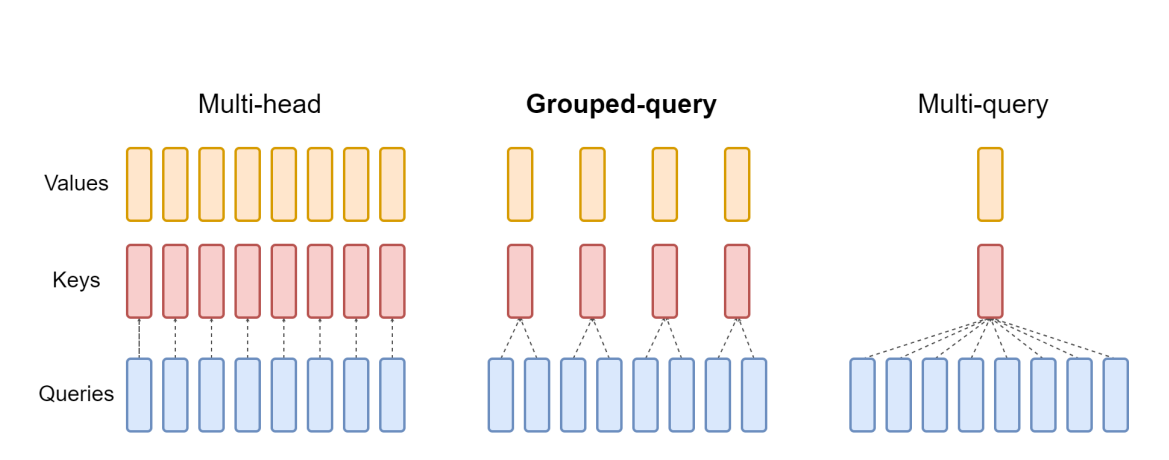

This is grouped query attention which is generatlization of both multihead and ulti query attention with some part of multi head and some part of multi query as you can see in  the above picture<br>
 GQA is a generalization of MQA that employs an intermediate number of key-value heads. This enables a trade-off between speed and performance

## Applying in our attention block

In [ ]:
class Attention_rope_slide_group(nn.Module):
    def __init__(self, d_model=768, n_head=4, n_query_per_head=2, window_size=3, n_ctx=1024, d_head=64, bias=True, scale=False, look_forward=1, look_backward=1):
        '''
        An implementation of a grouped query attention, as proposed in Longformer.
        It combines rotational embeddings and sliding window attention for result comparison.

        Params:
        d_model: The dimension to be fed into our model
        n_head: The number of heads for attention
        n_query_per_head: The number of queries given each head
        n_ctx: A parameter for buffer registry for bias
        d_head: The dimension of head output
        bias: A bool for including or not including bias
        scale: Whether to scale the attention scores by the square root of the dimension of the queries(use sqrt(dk) or not)
        look_forward: Number of positions to look forward in sliding window attention
        look_backward: Number of positions to look backward in sliding window attention
        '''
        super().__init__()
        # Initialization of the model parameters
        self.n_head = n_head
        self.n_query_per_head = n_query_per_head
        self.d_model = d_model
        self.query_proj = nn.Linear(d_model, n_head * d_head)
        self.c_attn = Conv1D(d_model, d_model * 3)
        self.proj_out = nn.Linear(n_head * d_head, d_model)
        self.scale = scale
        self.softmax = nn.Softmax(dim=-1)
        self.register_buffer("bias", torch.tril(torch.ones(n_ctx, n_ctx)).view(1, 1, n_ctx, n_ctx))
        self.dropout = nn.Dropout(0.1)
        self.c_proj = Conv1D(d_model, d_model)
        self.rotary_emb = RotaryEmbedding(dim=32)  # initializing the rotatory embedding with dimension 32
        self.window_size = window_size

        # Properties specific to this attention mechanism
        self.supports_attention_mask = True
        self.supports_key_padding_mask = False
        self.attention_mask: Optional[torch.Tensor] = None  # attention mask to store the values of the slided attention window
        self.requires_same_k_q_dimensions = True
        self.look_backward = look_backward
        self.look_forward = look_forward
        self.causal = False
        self.force_sparsity = False
        self.shared_qk = False
        self.attn_mask = None
        self.TOKEN_SELF_ATTN_VALUE = -5e4

    def _get_local_mask(self, shape: torch.Size) -> AttentionMask:
        # Function to get the local mask for attention
        self.window_size = min(self.window_size * 2 + 1, shape[1]) if self.causal else min(self.window_size, shape[1])
        mask = local_1d_pattern(shape[1], window_size)

        if self.causal:
            mask &= causal_1d_pattern(shape[1])

        mask = sparsify(mask) if self.force_sparsity else maybe_sparsify(mask)

        # Convert mask to tensor and set its dtype to float32
        mask_tensor = mask.to(torch.float32)

        return AttentionMask(mask_tensor)

    def split_heads(self, x):
        """
        Splitting into a given number of heads and then returning
        return shape [batch, head, sequence, features]
        """
        new_shape = x.size()[:-1] + (self.n_head, x.size(-1) // self.n_head)
        x = x.view(*new_shape)
        return x.permute(0, 2, 1, 3)

    def split_heads_query(self, x):
        """
        Split the last dimension of x into heads and reshape.
        Returns shape [batch, n_head * n_query_per_head, sequence, features].
        """
        # Get the original shape of x
        original_shape = x.size()

        # Calculate the required size for the last dimension
        new_dim_size = self.n_head * self.n_query_per_head

        # Ensure the size is divisible, if not, trim or pad
        if original_shape[-1] % new_dim_size != 0:
            diff = new_dim_size - (original_shape[-1] % new_dim_size)
            x = F.pad(x, (0, diff), "constant", 0)

        # Split the last dimension into n_head * n_query_per_head
        x = x.view(original_shape[0], original_shape[1], new_dim_size, -1)

        # Transpose to have the shape [batch, n_head * n_query_per_head, sequence, features]
        x = x.permute(0, 2, 1, 3)

        return x

    def _attn(self, q, k, v, attn_mask=None):
        """The main attention function
        That calculates the attention using our dot product formula"""
        scores = torch.matmul(q, k.transpose(-2, -1))  # dot multiplication between q and k transpose
        if self.scale:
            scores = scores / math.sqrt(v.size(-1))  # scaling it by dividing by sqrt(dk)
        nd, ns = scores.size(-2), scores.size(-1)
        if attn_mask is not None:
            scores = scores + attn_mask  # adding scores with attention mask values
        scores = self.softmax(scores)  # adding softmax values
        scores = self.dropout(scores)  # dropout of 0.1 as mentioned
        outputs = torch.matmul(scores, v)  # now the final matrix multiplication between score and V
        return outputs

    def merge_heads(self, x):
        # merging the attention heads into one
        x = x.permute(0, 2, 1, 3).contiguous()
        new_shape = x.size()[:-2] + (x.size(-2) * x.size(-1),)
        return x.view(*new_shape)

    def merge_heads_query(self, x, original_shape):
        """
        Merge the heads back to the original shape.
        Assumes the input shape is [batch, (n_head // 2) * n_query_per_head, sequence, features].
        Returns the shape [batch, n_head * n_query_per_head, sequence, features].
        """
        # Reverse the doubling of features dimension
        x = x.reshape(original_shape[0], -1, original_shape[2], original_shape[3] // self.n_query_per_head)

        # Transpose back to the shape [batch, (n_head // 2) * n_query_per_head, sequence, features]
        x = x.permute(0, 2, 1, 3)

        # Merge the last dimension into n_head * n_query_per_head
        x = x.reshape(original_shape[0], original_shape[1], -1, original_shape[3])

        return x

    def forward(self, x, mask=None, input_mask=None, attn_bias=None, window_size=None):
        '''The feed forward function that calculates the attention, split the heads, make attention, merge heads and project out the output
        Applies convolutional attention to the input tensor.
        Splits the query, key, and value tensors into heads.
        Applies rotary embeddings to the query and key.
        Dynamically sets the window size if provided.
        Asserts that the sequence length is divisible by the window size.
        Applies the sliding window attention mechanism.
        Computes attention, applies masks, and performs aggregation.
        Returns the final output tensor.'''
        mask = default(mask, input_mask)

        x = self.c_attn(x)  # new `x` shape - `[1,3,2304]`
        q, k, v = x.split(self.d_model, dim=2)

        q, k, v = self.split_heads_query(q), self.split_heads(k), self.split_heads(v)
        q = self.merge_heads_query(q, k.shape)  # re-merging these queries to do the same dimension to keys for projecting

        # applying the rotatory embeddings over query and key
        q = self.rotary_emb.rotate_queries_or_keys(q)
        k = self.rotary_emb.rotate_queries_or_keys(k)
        shape, pad_value, window_size, causal, look_backward, look_forward, shared_qk = q.shape, -1, default(
            window_size, self.window_size), self.causal, self.look_backward, self.look_forward, self.shared_qk
        (q, packed_shape), (k, _), (v, _) = map(lambda t: pack([t], '* n d'), (q, k, v))
        b, n, dim_head, device, dtype = *q.shape, q.device, q.dtype

        scale = default(self.scale, dim_head ** -0.5)

        if window_size is not None:
            self.window_size = window_size  # Set the window size dynamically

        assert (n % window_size) == 0, f'sequence length {n} must be divisible by window size {window_size} for local attention'

        windows = n // window_size

        seq = torch.arange(n, device=device)
        b_t = rearrange(seq, '(w n) -> 1 w n', w=windows, n=window_size)

        bq, bk, bv = map(lambda t: rearrange(t, 'b (w n) d -> b w n d', w=windows), (q, k, v))  # getting the windowed value of q, k, and v

        bq = bq * scale  # applying the value of scale to query

        look_around_kwargs = dict(
            backward=look_backward,
            forward=look_forward,
            pad_value=pad_value
        )

        bk = look_around(bk, **look_around_kwargs)
        bv = look_around(bv, **look_around_kwargs)

        bq_t = b_t
        bq_k = look_around(b_t, **look_around_kwargs)

        bq_t = rearrange(bq_t, '... i -> ... i 1')
        bq_k = rearrange(bq_k, '... j -> ... 1 j')

        pad_mask = bq_k == pad_value

        sim = einsum('b h i e, b h j e -> b h i j', bq, bk)

        if exists(attn_bias):
            heads = attn_bias.shape[0]
            assert (b % heads) == 0

            attn_bias = repeat(attn_bias, 'h i j -> (b h) 1 i j', b=b // heads)
            sim = sim + attn_bias

        mask_value = max_neg_value(sim)

        if shared_qk:
            self_mask = bq_t == bq_k
            sim = sim.masked_fill(self_mask, self.TOKEN_SELF_ATTN_VALUE)
            del self_mask

        sim = sim.masked_fill(pad_mask, mask_value)

        # take care of key padding mask passed in

        if exists(mask):
            batch = mask.shape[0]
            assert (b % batch) == 0

            h = b // mask.shape[0]

            mask = rearrange(mask, '... (w n) -> (...) w n', w=windows, n=window_size)
            mask = look_around(mask, **{**look_around_kwargs, 'pad_value': False})
            mask = rearrange(mask, '... j -> ... 1 j')
            mask = repeat(mask, 'b ... -> (b h) ...', h=h)
            sim = sim.masked_fill(~mask, mask_value)
            del mask

        # attention

        attn = sim.softmax(dim=-1)
        attn = self.dropout(attn)

        # aggregation

        out = einsum('b h i j, b h j e -> b h i e', attn, bv)
        out = rearrange(out, 'b w n d -> b (w n) d')

        out = self.proj_out(out)
        out, *_ = unpack(out, packed_shape, '* n d')
        out = rearrange(out, 'b n s d -> b s (n d)')
        return out

In [ ]:
class TransformerBlock_rope_slide_group(nn.Module):
    def __init__(self, d_model=768, n_head=4,n_query_per_head=2, dropout=0.1,window_size=2):
        self.window_size=window_size
        super().__init__()
        self.attn        = Attention_rope_slide_group(d_model=768,window_size=window_size, n_head=n_head,n_query_per_head=n_query_per_head, d_head=64, n_ctx=1024, bias=True, scale=False)
        self.feedforward = FeedForward(dropout=0.1, d_model=768, nx=768*4)
        self.ln_1        = LayerNorm(d_model)
        self.ln_2        = LayerNorm(d_model)

    def forward(self, x):
        x = x + self.attn(self.ln_1(x),window_size=self.window_size)
        x = x + self.feedforward(self.ln_2(x))
        return x

In [ ]:
class GPT2_rope_slide_group(nn.Module):
    def __init__(self, nlayers=12, n_ctx=1024, d_model=768, vcb_sz=50257):
        super(GPT2_rope_slide_group, self).__init__()
        self.nlayers = nlayers
        self.window_size=5
        self.n_head=4
        self.n_query_per_head=2
        block        = TransformerBlock_rope_slide_group(window_size=self.window_size,n_head=self.n_head,n_query_per_head=self.n_query_per_head,d_model=768, dropout=0.1)
        self.h       = _get_clones(block, 12)
        self.wte     = nn.Embedding(vcb_sz, d_model)
        self.wpe     = nn.Embedding(n_ctx, d_model)
        self.drop    = nn.Dropout(0.1)
        self.ln_f    = LayerNorm(d_model)
        self.out     = nn.Linear(d_model, vcb_sz, bias=False)
        self.loss_fn = nn.CrossEntropyLoss()
        self.init_weights()

    def set_window_size(self, window_size):
        '''Function for dynamically setting the window size which is later used while inferencing'''
        self.window_size = window_size

    def set_heads(self,n_head,n_query_per_head):
        '''A function for setting the heads variable for heads and number of per queries per head'''
        self.n_head=n_head
        self.n_query_per_head=n_query_per_head

    def init_weights(self):
        '''Initialization of weights'''
        self.out.weight = self.wte.weight
        self.apply(self._init_weights)

    def _init_weights(self, module):
        '''If the Linear, Embedding and Conv1D then nomrally initializing with mean and S.D'''
        if isinstance(module, (nn.Linear, nn.Embedding, Conv1D)):
            module.weight.data.normal_(mean=0.0, std=0.02)
            if isinstance(module, (nn.Linear, Conv1D)) and module.bias is not None:
                '''Data Bias zero'''
                module.bias.data.zero_()
        elif isinstance(module, nn.LayerNorm):
            module.bias.data.zero_()
            module.weight.data.fill_(1.0)

    def forward(self, src, labels=None, pos_ids=None):
        '''Adding the positional embedding, dropping, then adding inputs, logits and outputs which are being used for loss function and then adding outputs and loss'''
        if pos_ids is None:
            pos_ids = torch.arange(0, src.size(-1)).unsqueeze(0)
        pos_ids = pos_ids.to(src.device)  # Ensure pos_ids is on the same device as src
        inp = self.drop((self.wte(src) + self.wpe(pos_ids)))
        for i in range(self.nlayers):
            inp = self.h[i](inp)
        inp = self.ln_f(inp)
        logits = self.out(inp)
        outputs = (logits,) + (inp,)

        if labels is not None:
            shift_logits = logits[..., :-1, :].contiguous()
            shift_labels = labels[..., 1:].contiguous()
            loss = self.loss_fn(shift_logits.view(-1, shift_logits.size(-1)), shift_labels.view(-1))
            outputs = (loss,) + outputs
            return loss.mean()
        return logits


## Generating text and Checking model stats

In [ ]:
model = GPT2_rope_slide_group()
# load pretrained_weights from hugging face

model_dict = model.state_dict() #currently with random initialization
state_dict = torch.load("/content/drive/MyDrive/gpt2-pytorch_model.bin") #pretrained weights

In [ ]:
old_keys = []
new_keys = []
for key in state_dict.keys():
    if "mlp" in key: #The hugging face state dict references the feedforward network as mlp, need to replace to `feedforward` be able to reuse these weights
        new_key = key.replace("mlp", "feedforward")
        new_keys.append(new_key)
        old_keys.append(key)

for old_key, new_key in zip(old_keys, new_keys):
    state_dict[new_key]=state_dict.pop(old_key)

pretrained_dict = {k: v for k, v in state_dict.items() if k in model_dict}

model_dict.update(pretrained_dict)
model.load_state_dict(model_dict)
model.eval() #model in inference mode as it's now initialized with pretrained weights

GPT2_rope_slide_group(
  (h): ModuleList(
    (0-11): 12 x TransformerBlock_rope_slide_group(
      (attn): Attention_rope_slide_group(
        (query_proj): Linear(in_features=768, out_features=256, bias=True)
        (c_attn): Conv1D()
        (proj_out): Linear(in_features=256, out_features=768, bias=True)
        (softmax): Softmax(dim=-1)
        (dropout): Dropout(p=0.1, inplace=False)
        (c_proj): Conv1D()
        (rotary_emb): RotaryEmbedding()
      )
      (feedforward): FeedForward(
        (c_fc): Conv1D()
        (c_proj): Conv1D()
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
    )
  )
  (wte): Embedding(50257, 768)
  (wpe): Embedding(1024, 768)
  (drop): Dropout(p=0.1, inplace=False)
  (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  (out): Linear(in_features=768, out_features=50257, bias=False)
  (loss_fn)

In [ ]:
total_params = sum(p.numel() for p in model.parameters())

# Calculate size in bytes and megabytes
size_bytes = total_params * 4  # Assuming float32 parameters, where each parameter is 4 bytes
size_mb = size_bytes / (1024 ** 2)

print(f"Total size of the GPT-2 with rotatory embeddings, sliding window attention and grouped query attention is: {size_bytes} bytes or {size_mb:.2f} MB")

Total size of the GPT-2 with rotatory embeddings, sliding window attention and grouped query attention is: 516683520 bytes or 492.75 MB


In [ ]:
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
context = torch.tensor([tokenizer.encode("The planet earth is a")])

def generate_dynamic(context, window_size,n_head=4,n_query_per_head=2, ntok=20):
    start_time = time.time()
    for _ in range(ntok):
        model.set_window_size(window_size)  # Set the window size dynamically
        model.set_heads(n_head,n_query_per_head)
        out = model(context)
        logits = out[:, -1, :]
        indices_to_remove = logits < torch.topk(logits, 10)[0][..., -1, None]
        logits[indices_to_remove] = np.NINF
        next_tok = torch.multinomial(F.softmax(logits, dim=-1), num_samples=1).squeeze(1)
        context = torch.cat([context, next_tok.unsqueeze(-1)], dim=-1)

        # Dynamically adjust the length of the input sequence based on the window_size
        input_length = context.size(-1)
        padding_size = window_size - (input_length % window_size)
        if padding_size != window_size:
            pad_token_id = tokenizer.pad_token_id if tokenizer.pad_token_id is not None else 0
            padding_tokens = torch.zeros((context.size(0), padding_size), dtype=torch.long, device=context.device) + pad_token_id
            context = torch.cat([context, padding_tokens], dim=-1)

    end_time = time.time()
    inference_time = end_time - start_time
    return context, inference_time

# Usage
window_size = 5  # Adjust this as needed
out, inference_time = generate_dynamic(context, ntok=20, window_size=window_size)
decoded_output = tokenizer.decode(out[0])

print(f"Inference Time: {inference_time:.4f} seconds")
print(f"Generated Output: {decoded_output}")

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

Inference Time: 6.3245 seconds
Generated Output: The planet earth is a
!!!! the!!!! the!!!! the!!!!,!!!!
!!!! the!!!!
!!!!
!!!! The!!!!
!!!!.!!!!,!!!! and!!!!
!!!! the!!!!
!!!! the!!!!.!!!! the!!!!


Wwe can see that there is a significant decrease in size due to less layers as before we were making all the multi head computations but now we have done lesser so there was around 10 MB size decrease<br>
Also, the time was reducted around 1.5 seconds after appyling this grouped query attention, there would be bigger difference in times would be seen if we are doing it for longer chunks

# Single GPU Training Loop
This is a code for training our GPT-2 on a single GPU
For these purpose I would be using shakshepher.txt to demnostartate the training process, how it is happening

## Training Functions

In [ ]:
class TrainerConfig:
    '''Class for seeting the Training for training configurations'''
    # optimization parameters
    max_epochs = 10
    batch_size = 8
    learning_rate = 3e-4
    betas = (0.9, 0.95)
    grad_norm_clip = 1.0
    weight_decay = 0.1  # only applied on matmul weights
    # learning rate decay params: linear warmup followed by cosine decay to 10% of original
    lr_decay = False
    warmup_tokens = 375e6  # these two numbers come from the GPT-3 paper, but may not be good defaults elsewhere
    final_tokens = 260e9  # (at what we reach 10% of original LR)
    # checkpoint settings
    ckpt_path = None
    num_workers = 0  # for DataLoader

    def __init__(self, **kwargs):
        for k, v in kwargs.items():
            setattr(self, k, v)

In [ ]:
class Trainer:
    def __init__(self, model, train_dataset, test_dataset, config):
        self.model = model
        self.train_dataset = train_dataset
        self.test_dataset = test_dataset
        self.config = config

        # take over whatever gpus are on the system
        self.device = "cpu"
        if torch.cuda.is_available():
            self.device = torch.cuda.current_device()
            self.model = torch.nn.DataParallel(self.model).to(self.device)

    def save_checkpoint(self):
        # DataParallel wrappers keep raw model object in .module attribute
        raw_model = self.model.module if hasattr(self.model, "module") else self.model
        logger.info(f"saving {self.config.ckpt_path}")
        torch.save(raw_model.state_dict(), self.config.ckpt_path)

    def train(self):
        model, config = self.model, self.config#getting the model and training configurations
        raw_model = model.module if hasattr(self.model, "module") else model
        self.optimizer = torch.optim.Adam(self.model.parameters(), lr=config.learning_rate)

        def run_epoch(split):
            is_train = split == "train"
            model.train(is_train)
            data = self.train_dataset if is_train else self.test_dataset
            loader = DataLoader(
                data,
                shuffle=True,
                pin_memory=True,
                batch_size=config.batch_size,
                num_workers=config.num_workers,
            )

            losses = []
            pbar = (
                tqdm(enumerate(loader), total=len(loader))
                if is_train
                else enumerate(loader)
            )
            for it, (x, y) in pbar:

                # place data on the correct device
                x = x.to(self.device)
                y = y.to(self.device)

                # forward the model
                with torch.set_grad_enabled(is_train):
                    loss = model(x, y)  # The forward method returns the mean of the loss directly
                    logits = model(x)
                    losses.append(loss.item())

                if is_train:

                    # backprop and update the parameters
                    model.zero_grad()
                    loss.backward(retain_graph=True)
                    torch.nn.utils.clip_grad_norm_(
                        model.parameters(), config.grad_norm_clip
                    )
                    self.optimizer.step()

                    # decay the learning rate based on our progress
                    if config.lr_decay:
                        self.tokens += (
                            y >= 0
                        ).sum()  # number of tokens processed this step (i.e. label is not -100)
                        if self.tokens < config.warmup_tokens:
                            # linear warmup
                            lr_mult = float(self.tokens) / float(
                                max(1, config.warmup_tokens)
                            )
                        else:
                            # cosine learning rate decay
                            progress = float(
                                self.tokens - config.warmup_tokens
                            ) / float(
                                max(1, config.final_tokens - config.warmup_tokens)
                            )
                            lr_mult = max(
                                0.1, 0.5 * (1.0 + math.cos(math.pi * progress))
                            )
                        lr = config.learning_rate * lr_mult
                        for param_group in self.optimizer.param_groups:
                            param_group["lr"] = lr
                    else:
                        lr = config.learning_rate

                    # repeat progress
                    pbar.set_description(
                        f"epoch {epoch+1} iter {it}: train loss {loss.item():.5f}, lr {lr:e}"
                    )

            if not is_train:
                test_loss = float(np.mean(losses))
                logger.info(f"test loss: {test_loss}")
                return test_loss

        best_loss = float("inf")
        self.tokens = 0  # counter used for learning rate decay
        for epoch in range(config.max_epochs):

            run_epoch("train")
            if self.test_dataset is not None:
                test_loss = run_epoch("test")

            # supports early stopping based on the test loss, or just save always is no test set is provided
            good_model = self.test_dataset is None or test_loss < best_loss
            if self.config.ckpt_path is not None and good_model:
                best_loss = test_loss if self.test_dataset is not None else float("inf")
                self.save_checkpoint()

## Dataset
Here we will be loading our dataset and making a dataloader for batch wise training

In [ ]:
class CharDataset(Dataset):

    def __init__(self, data, block_size):
        chars = sorted(list(set(data)))
        data_size, vocab_size = len(data), len(chars)
        print(f"data has {data_size:d} characters, {vocab_size:d} unique.")

        self.stoi = { ch: i for i, ch in enumerate(chars) }
        self.itos = { i: ch for i, ch in enumerate(chars) }
        self.block_size = block_size
        self.vocab_size = vocab_size
        self.data = data

    def __len__(self):
        return len(self.data) - self.block_size

    def __getitem__(self, idx):
        # grab a chunk of (block_size + 1) characters from the data
        chunk = self.data[idx:idx+self.block_size+1]
        # encode every character to an integer
        dix = [self.stoi[s] for s in chunk]
        x = torch.tensor(dix[:-1], dtype=torch.long)
        y = torch.tensor(dix[1:], dtype=torch.long)
        return x, y

In [ ]:
block_size=25

In [ ]:
text = open('/content/drive/MyDrive/shakespeare.txt', 'r').read()
train_dataset = CharDataset(text, block_size = 25) # 25 is for context storing

data has 94275 characters, 61 unique.


## Training with Modified architecture

In [ ]:
trainable_model = GPT2_rope_slide_group()#initialsing our model for training
trainable_model=trainable_model.to(device)

In [ ]:
tconf = TrainerConfig(
    max_epochs=1,
    batch_size=8,
    learning_rate=6e-4,
    lr_decay=True,
    warmup_tokens=512,
    final_tokens=2*len(train_dataset)*block_size,
    num_workers=4,
)
trainer = Trainer(trainable_model, train_dataset, None, tconf)
trainer.train()

epoch 1 iter 11781: train loss 0.34745, lr 3.000512e-04: 100%|██████████| 11782/11782 [31:10<00:00,  6.30it/s]


## Training with original GPT-2 archiecture

In [ ]:
trainable_model = GPT2()#initialsing our model for training
trainable_model=trainable_model.to(device)

In [ ]:
tconf = TrainerConfig(
    max_epochs=1,
    batch_size=8,
    learning_rate=6e-4,
    lr_decay=True,
    warmup_tokens=512,
    final_tokens=2*len(train_dataset)*block_size,
    num_workers=4,
)
trainer = Trainer(trainable_model, train_dataset, None, tconf)
trainer.train()

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
epoch 1 iter 11781: train loss 0.21490, lr 3.000512e-04: 100%|██████████| 11782/11782 [24:48<00:00,  7.91it/s]


## Inferencing our Modified Model

In [ ]:
def top_k_logits(logits, k):
    v, ix = torch.topk(logits, k)
    out = logits.clone()
    out[out < v[:, [-1]]] = -float("inf")
    return out

In [ ]:
def sample(model, x, steps, temperature=1.0, sample=False, top_k=None):
    """
    take a conditioning sequence of indices in x (of shape (b, t)) and predict the next token in
    the sequence, feeding the predictions back into the model each time. Clearly the sampling
    has quadratic complexity unlike an RNN that is only linear, and has a finite context window
    of block_size, unlike an RNN that has an infinite context window.
    """
    block_size = 25
    model.eval()
    for k in range(steps):
        x_cond = (
            x if x.size(1) <= block_size else x[:, -block_size:]
        )  # crop context if needed
        logits = model(x_cond)
        # pluck the logits at the final step and scale by temperature
        logits = logits[:, -1, :] / temperature
        # optionally crop probabilities to only the top k options
        if top_k is not None:
            logits = top_k_logits(logits, top_k)
        # apply softmax to convert to probabilites
        probs = F.softmax(logits, dim=-1)
        # sample from the distribution or take the most likely
        if sample:
            ix = torch.multinomial(probs, num_samples=1)
        else:
            _, ix = torch.topk(probs, k=1, dim=-1)
        # append to the sequence and continue
        x = torch.cat((x, ix), dim=1)

    return x

In [ ]:
context = "When are you going to change the diaper?"

# Check if each character in the context is in the vocabulary
try:
    indices = [train_dataset.stoi[s] for s in context]
except KeyError as e:
    print(f"Error: Character '{str(e)}' not found in the vocabulary.")
    # Handle the error or skip this context

# Convert the indices to a torch tensor
x = torch.tensor(indices, dtype=torch.long)[None, ...].to(trainer.device)

# Rest of your code...
y = sample(trainable_model, x, 2000, temperature=1.0, sample=True, top_k=10)[0]
completion = ''.join([train_dataset.itos[int(i)] for i in y])
print(completion)

When are you going to change the diaper?m e
ifns a etba eitleesl nse r:a r
i fnti n Tm etseslsaesil gi tesi esm sepetde. 
T e hsepahd ot'ruestns hc eec tahte lso,l htel u tu hsasi hdtle it eps rpae hpteu,rs o rs aeulm,nto ers rsls e epi e fahde
rsidte
et eslfaesl sepa rsld laefie.hr
rms
oemsnedemce ae,n hr piplstpe otwrdetd.ue
hser. r e
o rs rs eiesr. 
r
h eteu rde nslso slw etsls rsalsiesr:ie
os
e rs i sm esla oto fusls olwlsilsl,l
oes rs fi eslnsrsiga,rig
aiu smn eca oc o etlsoi,m otlys plites rs oahdiemg e h ahnslefatoeuys e wt hmnxesifxnuuler o i raesl
r: e
alts e lp eats ei r i rmeaecre ieusl,nl hde ptesr:e
o rsueu,s r rsntuesl altog e,a e
wt h at'rsa iuit rsne t'i rs h i rptrsnse
adcnes e
u ltepi,es h epafiemtse hsyte hsmte eprdts.o
e
hu s fi esl oes r hsl ilpiens,t
ie smsep rsa ersatr ot rsoi,n h rpipia,ie slaeiyns hpatip tt eseprsi,m e
apn'ts pesrsesdtde ot er fxmtsoeslsesae.r
u e rts e. Nrsepet.ut
hsrdt udsa reslne.ie
asie rtpe
hsaer,wae
i nsc uetos o fslslwsls igvsetefxiettrs

Our model has been trained and giving some random outputs due to less number of epochs it was trained on and given a small context window

## Inferencing the original model

In [ ]:
def top_k_logits(logits, k):
    v, ix = torch.topk(logits, k)
    out = logits.clone()
    out[out < v[:, [-1]]] = -float("inf")
    return out

In [ ]:
def sample(model, x, steps, temperature=1.0, sample=False, top_k=None):
    """
    take a conditioning sequence of indices in x (of shape (b, t)) and predict the next token in
    the sequence, feeding the predictions back into the model each time. Clearly the sampling
    has quadratic complexity unlike an RNN that is only linear, and has a finite context window
    of block_size, unlike an RNN that has an infinite context window.
    """
    block_size = 25
    model.eval()
    for k in range(steps):
        x_cond = (
            x if x.size(1) <= block_size else x[:, -block_size:]
        )  # crop context if needed
        logits = model(x_cond)
        # pluck the logits at the final step and scale by temperature
        logits = logits[:, -1, :] / temperature
        # optionally crop probabilities to only the top k options
        if top_k is not None:
            logits = top_k_logits(logits, top_k)
        # apply softmax to convert to probabilites
        probs = F.softmax(logits, dim=-1)
        # sample from the distribution or take the most likely
        if sample:
            ix = torch.multinomial(probs, num_samples=1)
        else:
            _, ix = torch.topk(probs, k=1, dim=-1)
        # append to the sequence and continue
        x = torch.cat((x, ix), dim=1)

    return x

In [ ]:
context = "When are you going to change the diaper?"

# Check if each character in the context is in the vocabulary
try:
    indices = [train_dataset.stoi[s] for s in context]
except KeyError as e:
    print(f"Error: Character '{str(e)}' not found in the vocabulary.")
    # Handle the error or skip this context

# Convert the indices to a torch tensor
x = torch.tensor(indices, dtype=torch.long)[None, ...].to(trainer.device)

# Rest of your code...
y = sample(trainable_model, x, 2000, temperature=1.0, sample=True, top_k=10)[0]
completion = ''.join([train_dataset.itos[int(i)] for i in y])
print(completion)

When are you going to change the diaper?dge the dddperrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrr

So we can see that our new model has performed much better than the oirignal GPT-2 by introducing diversity as in my original implementation has sliding window context so that model got easily all the context even in a small context window of 25 but in original there was context there so it just completed with its limited vocablury, also the rotation embeddings helped in more of positionals retention and grouped query attention ensure the faster inference as you can see we had a far more big and diverse just inferenced in 1 minute and original one took 30 seconds just to repeat the words, showing if the above are properly implemented and trained would yield better results

# Data Distributed Training

In [ ]:
def setup(rank, world_size):
    os.environ['MASTER_ADDR'] = 'localhost'
    os.environ['MASTER_PORT'] = '12355'

    # initialize the process group
    dist.init_process_group("gloo", rank=rank, world_size=world_size)

In [ ]:
def cleanup():
    dist.destroy_process_group()

In [ ]:
class Trainer_DDP:
    def __init__(self, model, train_dataset, test_dataset, config,rank,world_size):
        self.model = model
        self.train_dataset = train_dataset
        self.test_dataset = test_dataset
        self.config = config
        self.rank=rank
        self.world_size=world_size

        # take over whatever gpus are on the system
        self.device = "cpu"
        if torch.cuda.is_available():
            self.device = torch.cuda.current_device()
            self.model = torch.nn.DataParallel(self.model).to(self.device)

    def save_checkpoint(self):
        # DataParallel wrappers keep raw model object in .module attribute
        raw_model = self.model.module if hasattr(self.model, "module") else self.model
        logger.info(f"saving {self.config.ckpt_path}")
        torch.save(raw_model.state_dict(), self.config.ckpt_path)

    def train(self):
        model, config = self.model, self.config#getting the model and training configurations
        setup(self.rank, self.world_size)
        model = model().to(self.rank)#moving the model to device
        model = DDP(model, device_ids=[self.rank], output_device=self.rank, find_unused_parameters=True)#wrapping the model with DDP
        raw_model = model.module if hasattr(self.model, "module") else model
        self.optimizer = torch.optim.Adam(self.model.parameters(), lr=config.learning_rate)

        def run_epoch(self,split):
            print("running")
            is_train = split == "train"
            model.train(is_train)
            train_sampler=DistributedSampler(train_dataset, num_replicas=world_size, rank=self.rank, shuffle=False, drop_last=False)#making a distributed sampler for data parallel
            data = self.train_dataset if is_train else self.test_dataset

            self.loader = DataLoader(
                data,
                shuffle=True,
                pin_memory=True,
                batch_size=config.batch_size,
                num_workers=config.num_workers,
                sampler=train_sampler # adding this as sampler fr distributed data
            )

            losses = []
            pbar = (
                tqdm(enumerate(self.loader), total=len(self.loader))
                if is_train
                else enumerate(self.loader)
            )
            for it, (x, y) in pbar:

                # place data on the correct device
                x = x.to(self.device)
                y = y.to(self.device)

                # forward the model
                with torch.set_grad_enabled(is_train):
                    loss = model(x, y)  # The forward method returns the mean of the loss directly
                    logits = model(x)
                    losses.append(loss.item())

                if is_train:

                    # backprop and update the parameters
                    model.zero_grad()
                    loss.backward(retain_graph=True)
                    torch.nn.utils.clip_grad_norm_(
                        model.parameters(), config.grad_norm_clip
                    )
                    self.optimizer.step()

                    # decay the learning rate based on our progress
                    if config.lr_decay:
                        self.tokens += (
                            y >= 0
                        ).sum()  # number of tokens processed this step (i.e. label is not -100)
                        if self.tokens < config.warmup_tokens:
                            # linear warmup
                            lr_mult = float(self.tokens) / float(
                                max(1, config.warmup_tokens)
                            )
                        else:
                            # cosine learning rate decay
                            progress = float(
                                self.tokens - config.warmup_tokens
                            ) / float(
                                max(1, config.final_tokens - config.warmup_tokens)
                            )
                            lr_mult = max(
                                0.1, 0.5 * (1.0 + math.cos(math.pi * progress))
                            )
                        lr = config.learning_rate * lr_mult
                        for param_group in self.optimizer.param_groups:
                            param_group["lr"] = lr
                    else:
                        lr = config.learning_rate

                    # repeat progress
                    pbar.set_description(
                        f"epoch {epoch+1} iter {it}: train loss {loss.item():.5f}, lr {lr:e}"
                    )
                    cleanup()#cleaning up all the the done files on all GPUs

            if not is_train:
                test_loss = float(np.mean(losses))
                logger.info(f"test loss: {test_loss}")
                return test_loss

        best_loss = float("inf")
        self.tokens = 0  # counter used for learning rate decay
        for epoch in range(config.max_epochs):
            # if we are using DistributedSampler, we have to tell it which epoch this is
            self.loader.sampler.set_epoch(epoch)
            run_epoch("train")
            if self.test_dataset is not None:
                test_loss = run_epoch("test")

            # supports early stopping based on the test loss, or just save always is no test set is provided
            good_model = self.test_dataset is None or test_loss < best_loss
            if self.config.ckpt_path is not None and good_model:
                best_loss = test_loss if self.test_dataset is not None else float("inf")
                self.save_checkpoint()

In [ ]:
def init_process(rank,model,train_dataset,test_dataset,config, world_size):
    torch.cuda.set_device(rank)
    setup(rank, world_size)

    # create model, datasets, etc.
    trainer = Trainer_DDP(model, train_dataset, test_dataset, config, rank, world_size)
    trainer.train()

## Training our Model

In [ ]:
trainable_model = GPT2_rope_slide_group()#initialsing our model for training

In [ ]:
tconf = TrainerConfig(
    max_epochs=1,
    batch_size=8,
    learning_rate=6e-4,
    lr_decay=True,
    warmup_tokens=512,
    final_tokens=2*len(train_dataset)*block_size,
    num_workers=4,
)

In [ ]:
# suppose we have 2 gpus
world_size = 2
mp.spawn(
    init_process,
    args=(trainable_model,train_dataset,None,tconf,world_size),
    nprocs=world_size,
    join=True
)

Execution not possible due to single GPU avaliability on google colab

# FSDP
FSDP stands for Fully Sharded Data Parallel, it differs from DDP in that case the model needs to be fit on a single GPU and then there were copies being made and data was shared, while FSDP provides both model sharding and data parallelism so it helps in more optimzed model training Usually, model layers are wrapped with FSDP in a nested way, so that only layers in a single FSDP instance need to gather the full parameters to a single device during forward or backward computations


## Training Our Model

In [ ]:
class Trainer_FSDP:
    def __init__(self, model, train_dataset, test_dataset, config, rank, world_size):
        self.model = model
        self.train_dataset = train_dataset
        self.test_dataset = test_dataset
        self.config = config
        self.rank = rank
        self.world_size = world_size

        # Use available GPUs if present
        self.device = "cpu"
        if torch.cuda.is_available():
            self.device = torch.cuda.current_device()
            self.model = torch.nn.DataParallel(self.model).to(self.device)

    def save_checkpoint(self):
        # DataParallel wrappers keep raw model object in .module attribute
        raw_model = self.model.module if hasattr(self.model, "module") else self.model
        logger.info(f"saving {self.config.ckpt_path}")
        torch.save(raw_model.state_dict(), self.config.ckpt_path)

    def setup_ddp(self):
        # Distributed Data Parallel setup
        setup(self.rank, self.world_size)
        self.model = self.model().to(self.rank)
        self.model = DDP(self.model, device_ids=[self.rank], output_device=self.rank, find_unused_parameters=True)

    def initialize_optimizer(self):
        # Initialize optimizer
        self.optimizer = torch.optim.Adam(self.model.parameters(), lr=self.config.learning_rate)

    def run_epoch(self, split):
        print("running")
        is_train = split == "train"
        model.train(is_train)
        train_sampler = DistributedSampler(train_dataset, num_replicas=world_size, rank=self.rank, shuffle=False, drop_last=False)
        data = self.train_dataset if is_train else self.test_dataset

        self.loader = DataLoader(
            data,
            shuffle=True,
            pin_memory=True,
            batch_size=self.config.batch_size,
            num_workers=self.config.num_workers,
            sampler=train_sampler
        )
        # Set up auto wrap policy for our model
        my_auto_wrap_policy = functools.partial(
            size_based_auto_wrap_policy, min_num_params=100
        )
        torch.cuda.set_device(rank)

        # Starting and ending for our cuda event denoting when to allocate and free the memory
        init_start_event = torch.cuda.Event(enable_timing=True)
        init_end_event = torch.cuda.Event(enable_timing=True)

        # Setting up FSDP on our model
        model = FSDP(self.model)

        losses = []
        pbar = tqdm(enumerate(self.loader), total=len(self.loader)) if is_train else enumerate(self.loader)
        for it, (x, y) in pbar:
            # Place data on the correct device
            x = x.to(self.device)
            y = y.to(self.device)

            # Forward the model
            with torch.set_grad_enabled(is_train):
                loss = model(x, y)
                logits = model(x)
                losses.append(loss.item())

            if is_train:
                # Backprop and update the parameters
                model.zero_grad()
                loss.backward(retain_graph=True)
                torch.nn.utils.clip_grad_norm_(model.parameters(), self.config.grad_norm_clip)
                self.optimizer.step()

                # Decay the learning rate based on our progress
                if self.config.lr_decay:
                    self.tokens += (y >= 0).sum()
                    if self.tokens < self.config.warmup_tokens:
                        lr_mult = float(self.tokens) / float(max(1, self.config.warmup_tokens))
                    else:
                        progress = float(self.tokens - self.config.warmup_tokens) / float(
                            max(1, self.config.final_tokens - self.config.warmup_tokens)
                        )
                        lr_mult = max(0.1, 0.5 * (1.0 + math.cos(math.pi * progress)))
                    lr = self.config.learning_rate * lr_mult
                    for param_group in self.optimizer.param_groups:
                        param_group["lr"] = lr
                else:
                    lr = self.config.learning_rate

                pbar.set_description(f"epoch {epoch+1} iter {it}: train loss {loss.item():.5f}, lr {lr:e}")
                cleanup()

        if not is_train:
            test_loss = float(np.mean(losses))
            logger.info(f"test loss: {test_loss}")
            return test_loss

    def train(self):
        self.setup_ddp()
        self.initialize_optimizer()
        best_loss = float("inf")
        self.tokens = 0  # Counter used for learning rate decay
        for epoch in range(self.config.max_epochs):
            # If we are using DistributedSampler, we have to tell it which epoch this is
            self.loader.sampler.set_epoch(epoch)
            self.run_epoch("train")
            if self.test_dataset is not None:
                test_loss = self.run_epoch("test")

            # Supports early stopping based on the test loss, or just save always if no test set is provided
            good_model = self.test_dataset is None or test_loss < best_loss
            if self.config.ckpt_path is not None and good_model:
                best_loss = test_loss if self.test_dataset is not None else float("inf")
                self.save_checkpoint()


In [ ]:
trainable_model = GPT2_rope_slide_group()#initialsing our model for training

In [ ]:
tconf = TrainerConfig(
    max_epochs=1,
    batch_size=8,
    learning_rate=6e-4,
    lr_decay=True,
    warmup_tokens=512,
    final_tokens=2*len(train_dataset)*block_size,
    num_workers=4,
)

In [ ]:
# suppose we have 2 gpus
world_size = 2
mp.spawn(
    init_process,
    args=(trainable_model,train_dataset,None,tconf,world_size),
    nprocs=world_size,
    join=True
)

Thanks for reading